In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
#To plot required plots for the analysis
from matplotlib import pyplot as plt
import seaborn as sns
#To avoid any warnings in the middle importing warnings
import warnings
warnings.filterwarnings('ignore')
#To perform statistical tests
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#To perform regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
#Reads the data from csv file
bike_data=pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Finding shape of the dataframe
bike_data.shape

(730, 16)

In [4]:
#To know the info of the dataframe
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [6]:
#checking the percentage of missing values in dataframe
(bike_data.isnull().sum()*100)/len(bike_data)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# dropping the duplicates
bike_data.drop_duplicates(inplace=True)

There was no null values in the dataframe.

#### Removing unwanted coulmns which is not needed for the analysis

In [8]:
#removing instant coulmns as it was index 
bike_data.drop(['instant'],axis=1,inplace=True)


In [9]:
bike_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### convert such feature values into categorical string values before proceeding with model building


In [10]:
#converting season coulmn data from numerical to categorical
bike_data['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#converting weathersit coulmn data from numerical to categorical
bike_data['weathersit'].replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace = True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#converting weekday coulmn data from numerical to categorical
bike_data['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
#converting month coulmn data from numerical to categorical
bike_data['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### EDA

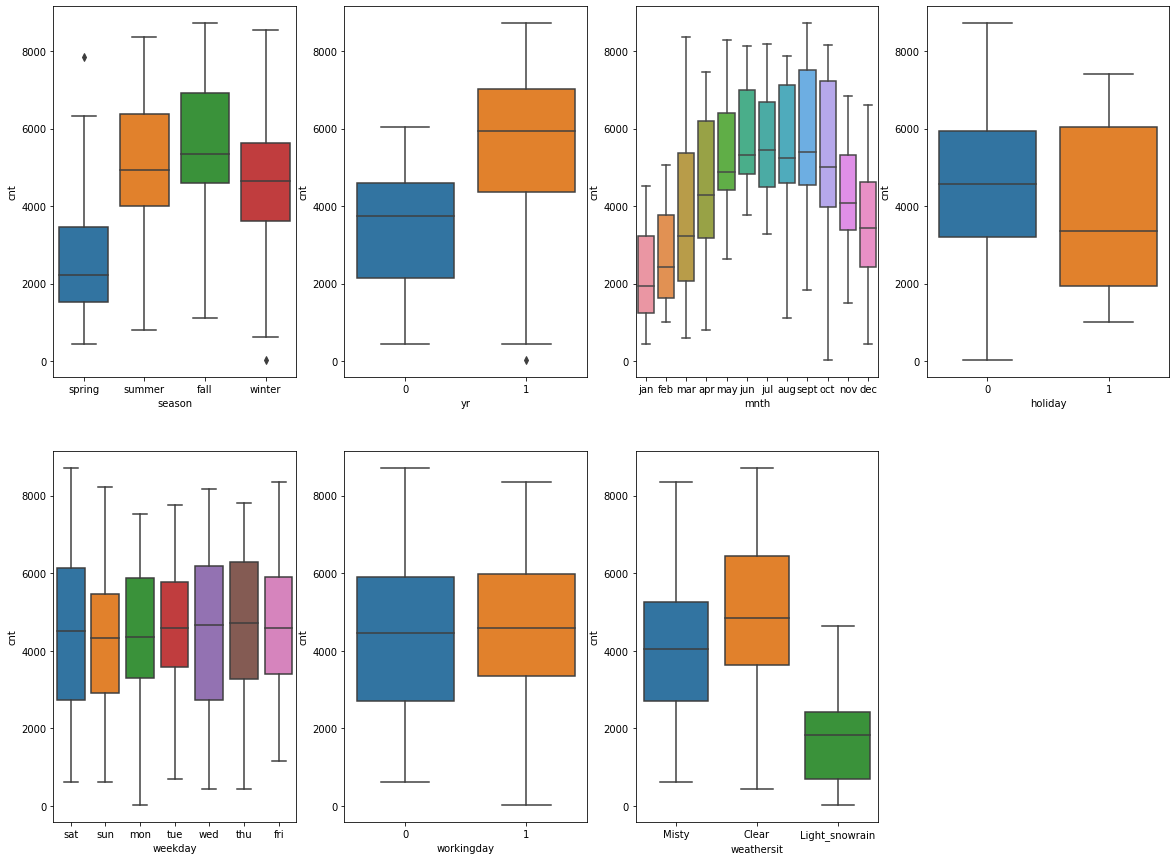

In [13]:
# visualizing the categorical columns

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)

plt.show()

#### Handling outliers

From the above diagram we can say that clearly we don't have any outliers.

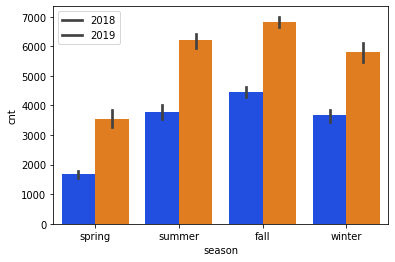

In [14]:
sns.barplot(x='season',y='cnt',data=bike_data,hue='yr',palette='bright')
plt.legend(labels=['2018', '2019'])
plt.show()

Every year booking count was rapidly increasing. Fall season has more booking.

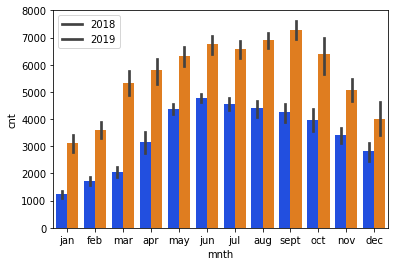

In [15]:
sns.barplot(x='mnth',y='cnt',data=bike_data,hue='yr',palette='bright')
plt.legend(labels=['2018', '2019'])
plt.show()

Number of booking ha increased year by year. In the months of may,june,july,august,september and october booking count has increased.

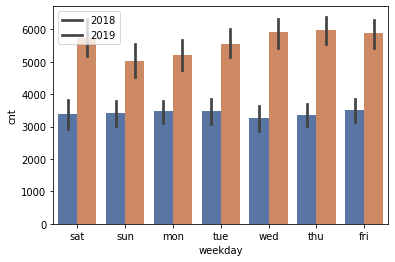

In [16]:
sns.barplot(x='weekday',y='cnt',data=bike_data,hue='yr',palette='deep')
plt.legend(labels=['2018', '2019'])
plt.show()

Us week starts with sunday so that we have encoded 0 as sunday. As per the plot saturday, wednesday,thursday, friday has highest booking count.

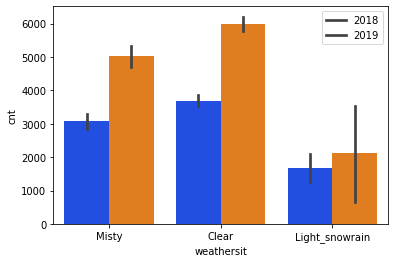

In [17]:
sns.barplot(x=bike_data['weathersit'],y=bike_data['cnt'],hue=bike_data['yr'],data=bike_data,palette='bright')
plt.legend(labels=['2018', '2019'])
plt.show()

As per the plot we can observe that in the 'clear' weather highest booking count.

In [18]:
#Removing causal,registered columns due to our main focus of analysis was final count. Count is sum of both coulmns. 

In [19]:
bike_data.drop(['casual', 'registered'],axis=1,inplace=True)
#removing dteday columns also due to vaiables like yr and mnth alaredy present
bike_data.drop(['dteday'],axis=1,inplace=True)

<AxesSubplot:>

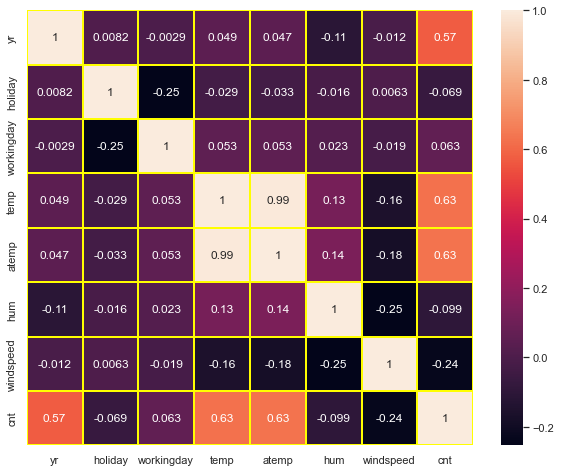

In [20]:
#Checking the correlation
data_correlation = bike_data.corr()
linewidths = 2
linecolor = "yellow"
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=data_correlation, annot=True, linewidths=linewidths,linecolor=linecolor)

There was linear relationship between temp and atemp coulmns. So that we cannot use these both coulmns going forward for analysis due to multicolinearity.

<Figure size 1080x2160 with 0 Axes>

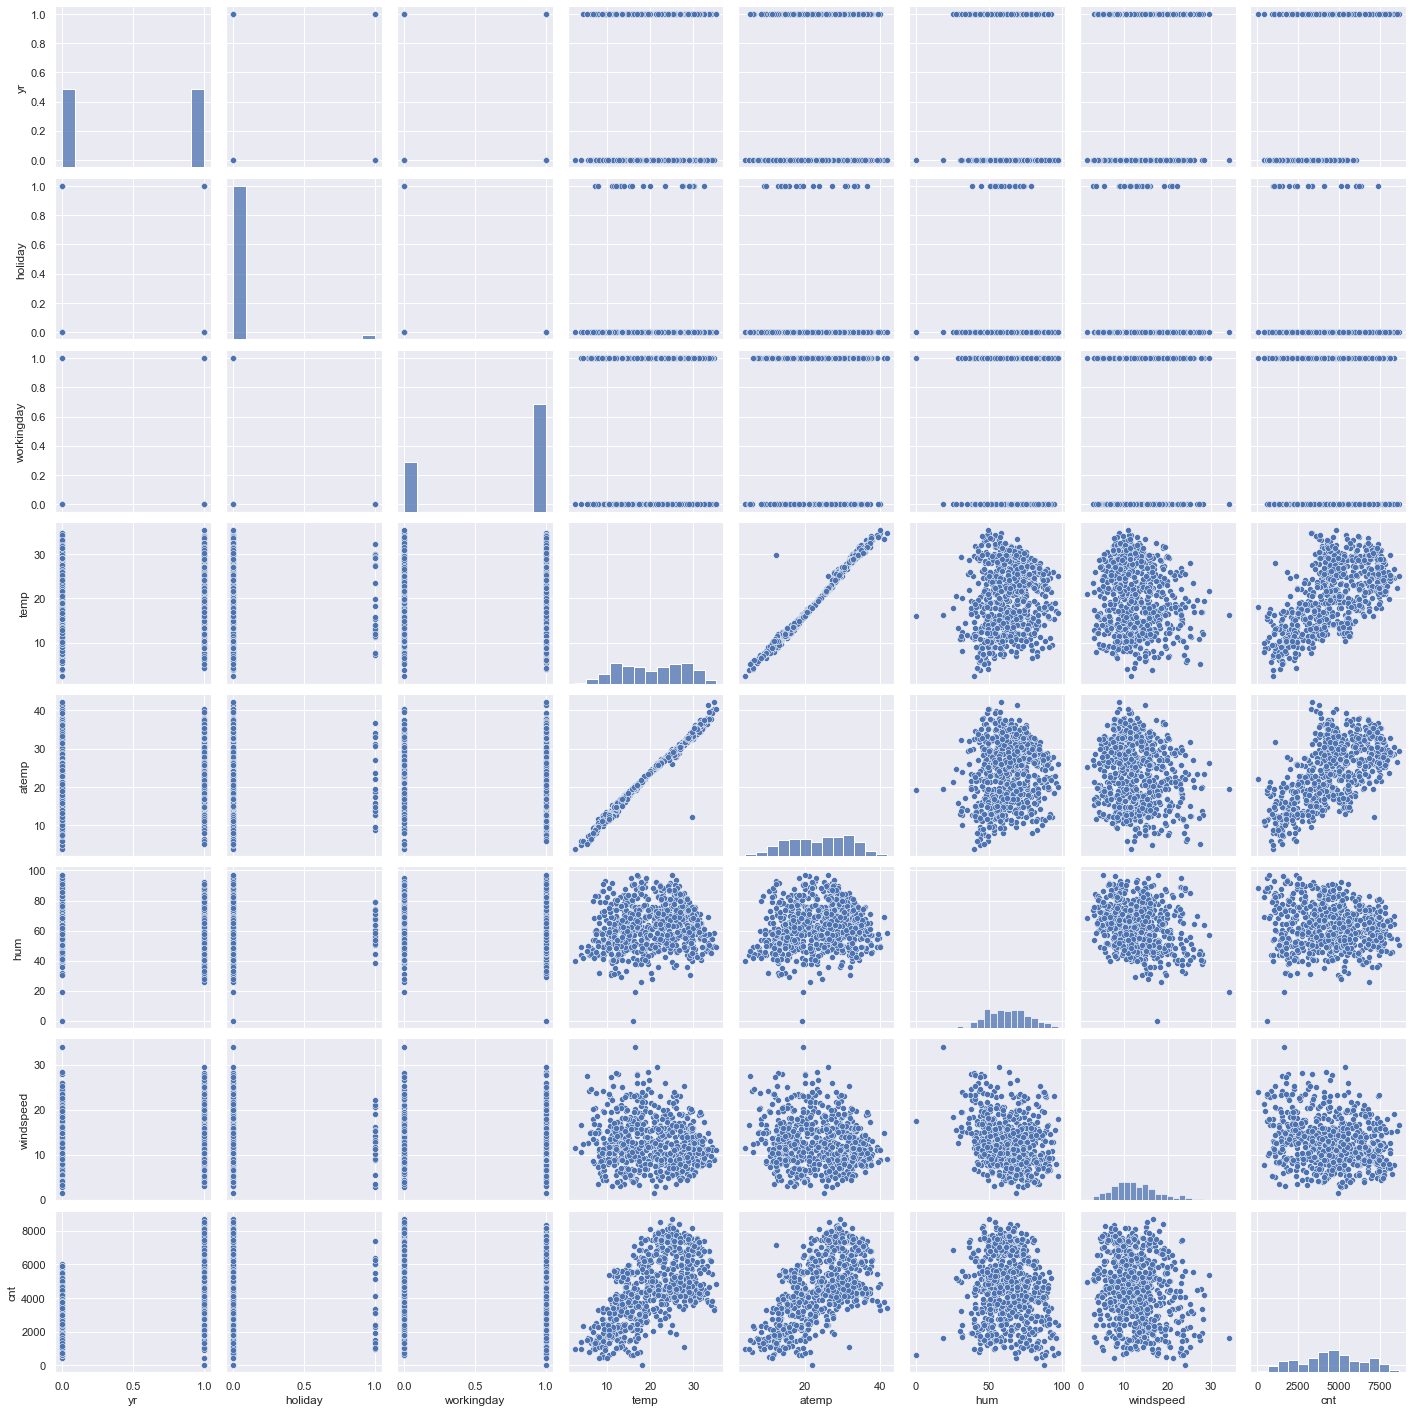

In [21]:
#Pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data)
plt.show()

temp and atemp columns are linearly correlated.


### Preparation of Data

Creating dummy variables using One Hot encoding method for categorical nominal columns like month, weekday, weathersit and season.

In [22]:
dummy_data_mnth=pd.get_dummies(bike_data.mnth,drop_first=True)
dummy_data_weekday=pd.get_dummies(bike_data.weekday,drop_first=True)
dummy_data_weather=pd.get_dummies(bike_data.weathersit,drop_first=True)
dummy_data_season=pd.get_dummies(bike_data.season,drop_first=True)

In [23]:
bike_data=pd.concat([bike_data,dummy_data_mnth,dummy_data_weekday,dummy_data_weather,dummy_data_season],axis=1)

In [24]:
#Removing unnecessary columns as we alraedy created dummy varies for that columns
bike_data.drop(['mnth', 'weekday','weathersit','season'],axis=1,inplace=True)


In [25]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

#### Splitting data in to train and test data

we will split 70% data into train data and remining 30% data into test data.

In [26]:
bikedata_train, bikedata_test = train_test_split(bike_data, train_size=0.7, random_state=100)

In [27]:
bikedata_train.shape

(510, 30)

In [28]:
bikedata_test.shape

(220, 30)

#### Using Minmax scaler to scale numerical columns

In [29]:
num_columns=['temp', 'atemp','hum', 'windspeed', 'cnt']

In [30]:
scaler = MinMaxScaler()


In [31]:
bikedata_train[num_columns] = scaler.fit_transform(bikedata_train[num_columns])
bikedata_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,1,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,1,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
bikedata_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

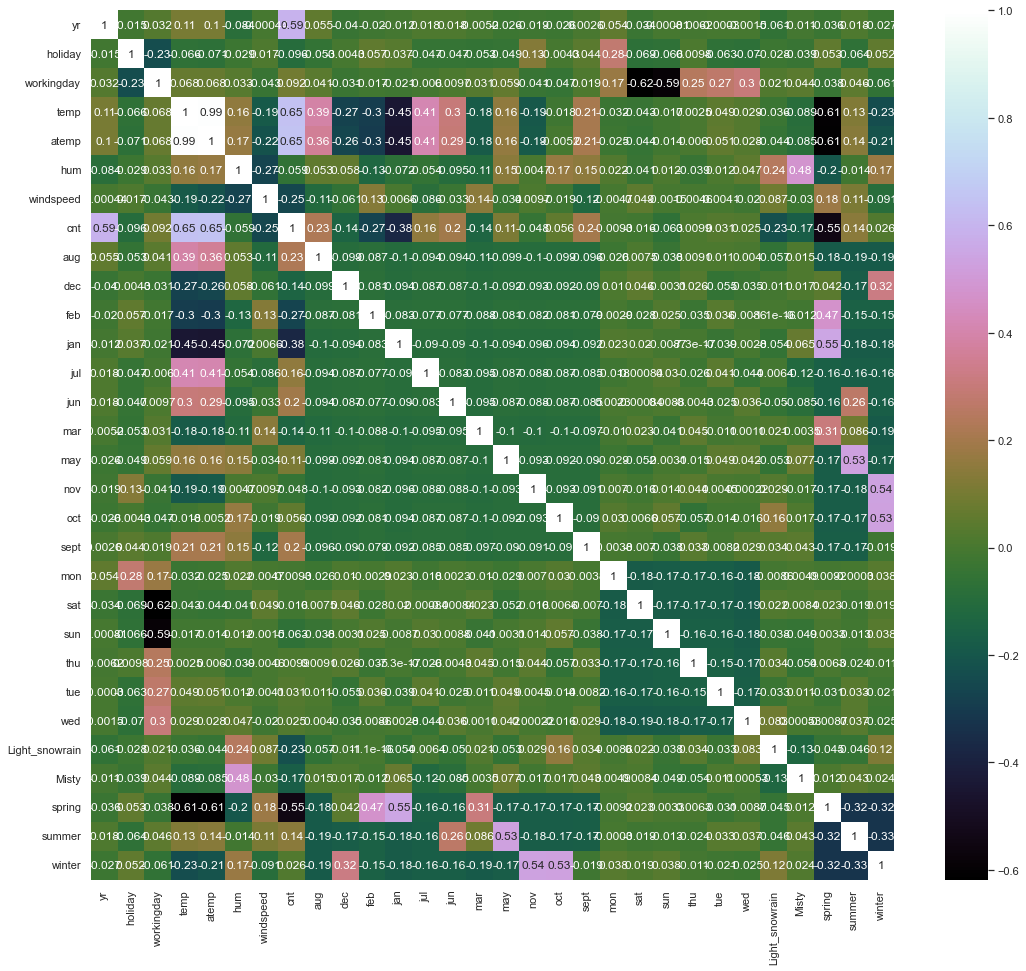

In [33]:
#Checking the correlation
train_data_correlation = bikedata_train.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(data=train_data_correlation, annot=True,cmap='cubehelix')

We can observe from the above plot no values were highly correlated.

#### Defining target variable for train data

In [34]:
y_train = bikedata_train.pop('cnt')

#### Defining future variable  for train data

In [35]:
X_train=bikedata_train

In [36]:
# Recursive feature elimination 
bike_lr= LinearRegression()
bike_lr.fit(X_train,y_train)


bike_rfe = RFE(bike_lr,n_features_to_select=15)
bike_rfe = bike_rfe.fit(X_train,y_train)

In [37]:
#Selecting top 15 list of variables
list(zip(X_train.columns,bike_rfe.support_,bike_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [38]:
#Function to calculate VIF of variables
def bike_calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [39]:
#Print Columns selected by RFE. We will manually eliminate for these columns
bike_X_train_rfe=X_train.columns[bike_rfe.support_]
bike_X_train_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'jul',
       'sept', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [40]:
#Checking which columns has been rejected

X_train.columns[~bike_rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building Model -1 

In [41]:
col = X_train.columns[bike_rfe.support_]
X_train_rfe = X_train[col]
X_train_sm_1 = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm_1)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.22e-191
Time:                        18:29:57   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
yr                 0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
hum               -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sept               0.0814      0.016      4.945      0.000       0.049       0.114
sat                0.0536      0.014      3.694      0.000       0.025       0.082
Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


#### Building Model - 2

In [43]:
#Dropping humidity variable due to high VIF value
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)


In [44]:
# Building 2nd linear regression model

X_train_sm_2 = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm_2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.60e-188
Time:                        18:29:57   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
yr                 0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
jul               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sept               0.0755      0.017      4.527      0.000       0.043       0.108
sat                0.0583      0.015      3.968      0.000       0.029       0.087
Light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,jul,1.59


#### Building Model - 3

In [46]:
#dropping holiday as it's having negetive coefficient
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.68e-189
Time:                        18:29:57   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.292      0.000       0.104       0.227
yr                 0.2346      0.008     28.941      0.000       0.219       0.251
workingday         0.0546      0.011      4.967      0.000       0.033       0.076
temp               0.4724      0.034     13.966      0.000       0.406       0.539
windspeed         -0.1572      0.025     -6.306      0.000      -0.206      -0.108
jan               -0.0398      0.018     -2.252      0.025      -0.074      -0.005
jul               -0.0468      0.018     -2.549      0.011      -0.083      -0.011
sept               0.0736      0.017      4.406      0.000       0.041       0.106
sat                0.0667      0.014      4.710      0.000       0.039       0.094
Light_snowrain    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
Misty             -0.0807      0.009     -9.351      0.000      -0.098      -0.064
spring            -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer             0.0448      0.015      2.980      0.003       0.015       0.074
winter             0.0775      0.017      4.499      0.000       0.044       0.111
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,yr,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,jul,1.59


#### Building Model - 4

In [48]:
#dropping windspeed as it's having high negative coef value
X_train_rfe = X_train_rfe.drop(['windspeed'], axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.11e-181
Time:                        18:29:58   Log-Likelihood:                 488.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1078      0.031      3.469      0.001       0.047       0.169
yr                 0.2333      0.008     27.724      0.000       0.217       0.250
workingday         0.0557      0.011      4.879      0.000       0.033       0.078
temp               0.4917      0.035     14.059      0.000       0.423       0.560
jan               -0.0253      0.018     -1.394      0.164      -0.061       0.010
jul               -0.0476      0.019     -2.495      0.013      -0.085      -0.010
sept               0.0782      0.017      4.513      0.000       0.044       0.112
sat                0.0643      0.015      4.380      0.000       0.035       0.093
Light_snowrain    -0.3045      0.025    -12.100      0.000      -0.354      -0.255
Misty             -0.0793      0.009     -8.846      0.000      -0.097      -0.062
spring            -0.0727      0.022     -3.355      0.001      -0.115      -0.030
summer             0.0357      0.016      2.298      0.022       0.005       0.066
winter             0.0810      0.018      4.532      0.000       0.046       0.116
==============================================================================
Omnibus:                       78.009   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.749
Skew:                          -0.746   Prob(JB):                     1.41e-47
Kurtosis:                       5.816   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,6.16
1,workingday,4.66
9,spring,2.30
0,yr,2.07
10,summer,2.06
6,sat,1.82
11,winter,1.73
3,jan,1.61
4,jul,1.59
8,Misty,1.58


#### Building Model - 5

In [50]:
#dropping jan as it's having high negative coef value
X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.94e-182
Time:                        18:29:58   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0989      0.030      3.248      0.001       0.039       0.159
yr                 0.2329      0.008     27.665      0.000       0.216       0.249
workingday         0.0556      0.011      4.866      0.000       0.033       0.078
temp               0.5038      0.034     14.860      0.000       0.437       0.570
jul               -0.0487      0.019     -2.554      0.011      -0.086      -0.011
sept               0.0783      0.017      4.517      0.000       0.044       0.112
sat                0.0642      0.015      4.367      0.000       0.035       0.093
Light_snowrain    -0.3032      0.025    -12.045      0.000      -0.353      -0.254
Misty             -0.0799      0.009     -8.919      0.000      -0.098      -0.062
spring            -0.0760      0.022     -3.528      0.000      -0.118      -0.034
summer             0.0381      0.015      2.462      0.014       0.008       0.068
winter             0.0850      0.018      4.811      0.000       0.050       0.120
==============================================================================
Omnibus:                       76.254   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.812
Skew:                          -0.729   Prob(JB):                     1.67e-46
Kurtosis:                       5.792   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,yr,2.07
9,summer,2.06
5,sat,1.81
8,spring,1.78
10,winter,1.73
3,jul,1.58
7,Misty,1.57
4,sept,1.34


#### Building Model - 6

In [52]:
#dropping workingday 
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.26e-178
Time:                        18:29:58   Log-Likelihood:                 476.11
No. Observations:                 510   AIC:                            -930.2
Df Residuals:                     499   BIC:                            -883.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1433      0.030      4.827      0.000       0.085       0.202
yr                 0.2334      0.009     27.119      0.000       0.216       0.250
temp               0.5056      0.035     14.584      0.000       0.437       0.574
jul               -0.0517      0.019     -2.653      0.008      -0.090      -0.013
sept               0.0776      0.018      4.379      0.000       0.043       0.112
sat                0.0198      0.012      1.682      0.093      -0.003       0.043
Light_snowrain    -0.2956      0.026    -11.509      0.000      -0.346      -0.245
Misty             -0.0768      0.009     -8.408      0.000      -0.095      -0.059
spring            -0.0790      0.022     -3.589      0.000      -0.122      -0.036
summer             0.0371      0.016      2.346      0.019       0.006       0.068
winter             0.0802      0.018      4.448      0.000       0.045       0.116
==============================================================================
Omnibus:                       79.031   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.216
Skew:                          -0.802   Prob(JB):                     4.96e-42
Kurtosis:                       5.526   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
1,temp,4.26
0,yr,2.07
8,summer,1.94
2,jul,1.58
9,winter,1.57
6,Misty,1.55
7,spring,1.41
3,sept,1.33
4,sat,1.18
5,Light_snowrain,1.07


#### Building Model - 7

In [54]:
#dropping sat as it's having high p value
X_train_rfe = X_train_rfe.drop(['sat'], axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.15e-179
Time:                        18:29:58   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1474      0.030      4.971      0.000       0.089       0.206
yr                 0.2330      0.009     27.033      0.000       0.216       0.250
temp               0.5040      0.035     14.519      0.000       0.436       0.572
jul               -0.0512      0.020     -2.623      0.009      -0.090      -0.013
sept               0.0776      0.018      4.372      0.000       0.043       0.113
Light_snowrain    -0.2948      0.026    -11.459      0.000      -0.345      -0.244
Misty             -0.0767      0.009     -8.378      0.000      -0.095      -0.059
spring            -0.0792      0.022     -3.588      0.000      -0.123      -0.036
summer             0.0369      0.016      2.331      0.020       0.006       0.068
winter             0.0802      0.018      4.442      0.000       0.045       0.116
==============================================================================
Omnibus:                       72.225   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.589
Skew:                          -0.730   Prob(JB):                     2.74e-39
Kurtosis:                       5.496   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Calculating VIF for train data
bike_calculate_VIF(X_train_rfe)

,Features,VIF
1,temp,4.21
0,yr,2.06
7,summer,1.94
2,jul,1.58
8,winter,1.56
5,Misty,1.55
6,spring,1.38
3,sept,1.33
4,Light_snowrain,1.06


#### Equation for the model:

const=0.1474+ (yr × 0.2330) + (temp × 0.5040) - (jul× -0.0512)+(sept× 0.0776)-(Light_snowrain× -0.2948)-(Misty× 0.0767)-(spring	× 0.0792)+(summer× 0.0369)+(winter× 0.0802)	

#### Residual Analysis

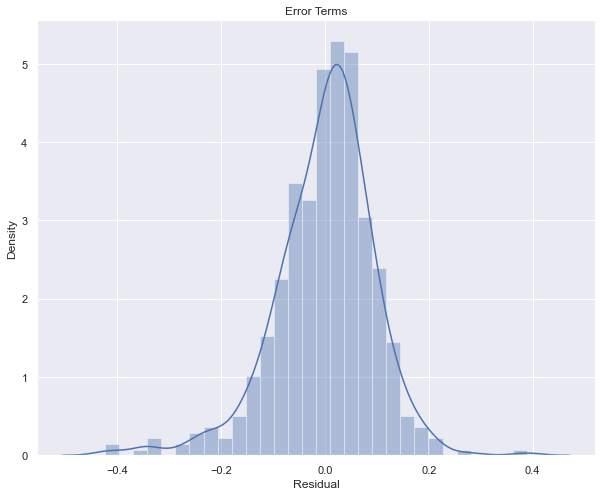

In [56]:
y_train_pred = lr_model.predict(X_train_sm)
sns.distplot(y_train-y_train_pred)
plt.xlabel('Residual')
plt.title('Error Terms')
plt.show()

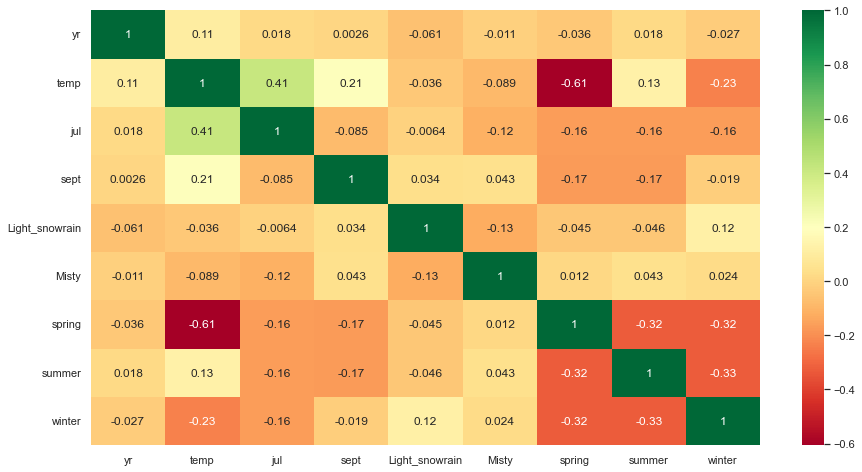

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

There was no multicolinearity found.

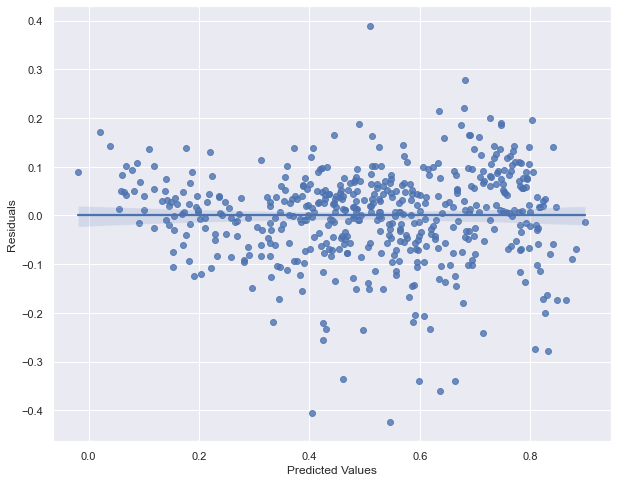

In [58]:
residual=y_train-y_train_pred
sns.regplot(x=y_train_pred, y=residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

As we can observe that from the above plot there is no relations between residual value and predicted value

#### Predicting on Test Data

In [59]:
# Applying scaling on the test dataset
bikedata_test[num_columns] = scaler.transform(bikedata_test[num_columns])
bikedata_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,1,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0.232858,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
bikedata_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Defining target variable  for test data

In [61]:
y_test = bikedata_test.pop('cnt')

#### Defining future variable  for test data

In [62]:
X_test = bikedata_test

In [63]:
#Test Input
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
#Predicting test data values
y_test_pred = lr_model.predict(X_test_new)

#### R-Squared value for test 

In [64]:
r2=r2_score(y_test, y_test_pred)
r2

0.8082117653777107

#### Evaluation of model

Text(0, 0.5, 'y_test_pred')

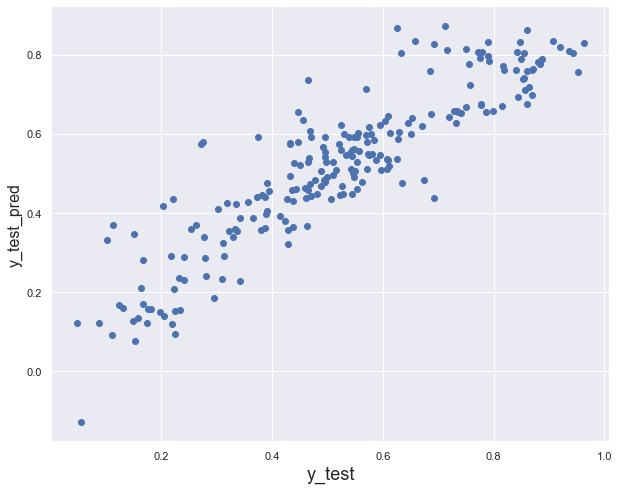

In [65]:
# Plotting y_test and y_test_pred

plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

#### Adjusted R-Square value for test  

In [66]:
# Get the shape of X_test_new
X_test_new.shape

(220, 10)

In [67]:
# n is number of rows in Xtest dataset
n = X_test_new.shape[0]

# Number of coulmns in Xtest dataset
p =X_test_new.shape[1]

# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2



0.7990352948216203

#### Comparison between trainings and test data results

Train R^2 :0.819,
Train Adjusted R^2 :0.816,
Test R^2 :0.8082,
Test Adjusted R^2 :0.7990

As per the results we can observe that model was good.

#### Conclusion

The variables that influence the demand for shared bikes:

temp: As we can observe from the coefficient value 0.5040 for temparature column. If temp variable increases bike hire numbers by 0.5040 units.

yr : As we can observe from the coefficient value 0.2330 for year column. If year increases bike hire numbers by 0.2330 units.

season: As we can observe from the coefficient values like spring,summer,winter we can state that if that variables increases the bike hiring count also increases.

weathersit:  As we can observe from the coefficient values like Light_snowrain,Misty we can state that if that variables increases the bike hiring count also increases.

